# Analisi del mercato immobiliare in Italia (2022)

In questo notebook:

- Esploro il dataset di annunci immobiliari in Italia.
- Pulisco i dati (valori mancanti, tipi, outlier).
- Creo indicatori come il prezzo al metro quadro.
- Eseguo un'analisi esplorativa (EDA).
- Esporto un dataset pulito per SQL (SQLite) e per Power BI.


In [5]:
import pandas as pd

df = pd.read_csv("housing_data_italy_2022.csv", sep=";")

# prime 5 righe
df.head()


,timestamp,location,title,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,energy_class,status,has_terrace,has_garden,has_balcony
0,1.661114e+09,siculiana,"villa unifamiliare via campo spoto 38, siculiana",46000.0,4.0,NaN,85.0,2.0,NaN,NaN,other,0.0,0.0,0.0
1,1.661114e+09,strongoli,"quadrilocale contrada tronga 211, tronca, stro...",120000.0,4.0,2.0,190.0,2.0,NaN,a3,other,0.0,0.0,0.0
2,1.661114e+09,zelbio,"bilocale buono stato, piano terra, zelbio",55000.0,2.0,NaN,85.0,1.0,NaN,g,other,0.0,1.0,0.0
3,1.661114e+09,villamagna,"casa colonica, da ristrutturare, 319 mÂ², vill...",130000.0,4.0,NaN,319.0,1.0,NaN,g,other,0.0,0.0,0.0
4,1.661114e+09,vallefiorita,"appartamento corso italia, vallefiorita",30000.0,NaN,NaN,143.0,2.0,NaN,g,other,0.0,0.0,0.0


In [6]:
# numero di righe e colonne
df.shape


(223409, 14)

In [7]:
# nomi di tutte le colonne
df.columns


Index(['timestamp', 'location', 'title', 'price', 'n_rooms', 'floor', 'mq',
       'n_bathrooms', 'year_of_construction', 'energy_class', 'status',
       'has_terrace', 'has_garden', 'has_balcony'],
      dtype='object')

In [8]:
# informazioni sui tipi di dato
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223409 entries, 0 to 223408
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             223409 non-null  float64
 1   location              223409 non-null  object 
 2   title                 223409 non-null  object 
 3   price                 184280 non-null  float64
 4   n_rooms               162745 non-null  float64
 5   floor                 150619 non-null  float64
 6   mq                    218868 non-null  float64
 7   n_bathrooms           208518 non-null  float64
 8   year_of_construction  222873 non-null  float64
 9   energy_class          222204 non-null  object 
 10  status                222883 non-null  object 
 11  has_terrace           222883 non-null  float64
 12  has_garden            222883 non-null  float64
 13  has_balcony           222883 non-null  float64
dtypes: float64(10), object(4)
memory usage: 23.9+ MB


In [9]:
# statistiche descrittive per le colonne numeriche
df.describe(include="all")


,timestamp,location,title,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,energy_class,status,has_terrace,has_garden,has_balcony
count,2.234090e+05,223409,223409,1.842800e+05,162745.000000,150619.000000,218868.000000,208518.000000,222873.000000,222204,222883,222883.000000,222883.000000,222883.000000
unique,NaN,7023,199184,NaN,NaN,NaN,NaN,NaN,NaN,12,1,NaN,NaN,NaN
top,NaN,pisa,palazzo - edificio in vendita,NaN,NaN,NaN,NaN,NaN,NaN,g,other,NaN,NaN,NaN
freq,NaN,192,3523,NaN,NaN,NaN,NaN,NaN,NaN,116488,222883,NaN,NaN,NaN
mean,1.661136e+09,NaN,NaN,2.399482e+05,3.503032,1.820806,158.676563,1.587614,1965.124726,NaN,NaN,0.111978,0.165450,0.102045
std,1.264542e+04,NaN,NaN,7.562329e+06,0.985463,1.134326,128.708818,0.667984,76.759739,NaN,NaN,0.315340,0.371587,0.302708
min,1.661114e+09,NaN,NaN,1.000000e+00,2.000000,1.000000,1.000000,1.000000,1000.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,1.661125e+09,NaN,NaN,7.800000e+04,3.000000,1.000000,80.000000,1.000000,1960.000000,NaN,NaN,0.000000,0.000000,0.000000
50%,1.661136e+09,NaN,NaN,1.350000e+05,3.000000,2.000000,118.000000,1.000000,1980.000000,NaN,NaN,0.000000,0.000000,0.000000
75%,1.661146e+09,NaN,NaN,2.350000e+05,4.000000,2.000000,188.000000,2.000000,2000.000000,NaN,NaN,0.000000,0.000000,0.000000


In [10]:
# conteggio dei valori mancanti per colonna
df.isna().sum().sort_values(ascending=False)


floor                   72790
n_rooms                 60664
price                   39129
n_bathrooms             14891
mq                       4541
energy_class             1205
year_of_construction      536
status                    526
has_garden                526
has_terrace               526
has_balcony               526
title                       0
timestamp                   0
location                    0
dtype: int64

In [14]:
# creo una copia del dataframe originale
df_clean = df.copy()

In [15]:
df_clean["date"] = pd.to_datetime(df_clean["timestamp"], unit="s")

# controllo
df_clean[["timestamp", "date"]].head()


,timestamp,date
0,1.661114e+09,2022-08-21 20:34:39
1,1.661114e+09,2022-08-21 20:34:40
2,1.661114e+09,2022-08-21 20:34:40
3,1.661114e+09,2022-08-21 20:34:40
4,1.661114e+09,2022-08-21 20:34:41


In [16]:
# quante righe hanno price o mq mancanti
df_clean[["price", "mq"]].isna().sum()


price    39129
mq        4541
dtype: int64

In [17]:
# elimino le righe senza prezzo o senza metri quadri
df_clean = df_clean.dropna(subset=["price", "mq"])

df_clean.shape


(181638, 15)

In [18]:
# quantili per price e mq
df_clean[["price", "mq"]].quantile([0.01, 0.99])


,price,mq
0.01,16500.0,35.0
0.99,1100000.0,700.0


In [19]:
q_low = df_clean["price"].quantile(0.01)
q_high = df_clean["price"].quantile(0.99)

mq_low = df_clean["mq"].quantile(0.01)
mq_high = df_clean["mq"].quantile(0.99)

df_clean = df_clean[
    (df_clean["price"].between(q_low, q_high)) &
    (df_clean["mq"].between(mq_low, mq_high))
]

df_clean.shape



(175538, 15)

In [20]:
df_clean["price_per_sqm"] = df_clean["price"] / df_clean["mq"]

# controllo rapido
df_clean[["location", "price", "mq", "price_per_sqm"]].head()


,location,price,mq,price_per_sqm
0,siculiana,46000.0,85.0,541.176471
1,strongoli,120000.0,190.0,631.578947
2,zelbio,55000.0,85.0,647.058824
3,villamagna,130000.0,319.0,407.523511
4,vallefiorita,30000.0,143.0,209.790210


In [21]:
bool_cols = ["has_terrace", "has_garden", "has_balcony"]

for col in bool_cols:
    df_clean[col] = df_clean[col].fillna(0)  # se mai mancasse qualcosa
    df_clean[col] = df_clean[col].astype(int)

df_clean[bool_cols].head()


,has_terrace,has_garden,has_balcony
0,0,0,0
1,0,0,0
2,0,1,0
3,0,0,0
4,0,0,0


In [22]:
df_clean.info()
df_clean.isna().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
Index: 175538 entries, 0 to 223408
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   timestamp             175538 non-null  float64       
 1   location              175538 non-null  object        
 2   title                 175538 non-null  object        
 3   price                 175538 non-null  float64       
 4   n_rooms               133873 non-null  float64       
 5   floor                 118889 non-null  float64       
 6   mq                    175538 non-null  float64       
 7   n_bathrooms           167525 non-null  float64       
 8   year_of_construction  175529 non-null  float64       
 9   energy_class          174971 non-null  object        
 10  status                175538 non-null  object        
 11  has_terrace           175538 non-null  int64         
 12  has_garden            175538 non-null  int64         
 13  has_

floor                   56649
n_rooms                 41665
n_bathrooms              8013
energy_class              567
year_of_construction        9
title                       0
price                       0
timestamp                   0
mq                          0
location                    0
status                      0
has_terrace                 0
has_garden                  0
has_balcony                 0
date                        0
price_per_sqm               0
dtype: int64

#  Analisi Esplorativa dei Dati (EDA)

In questa sezione analizzo il dataset pulito tramite statistiche descrittive e visualizzazioni.
L’obiettivo è comprendere meglio la distribuzione dei prezzi, dei metri quadri, del prezzo al metro quadro e le caratteristiche principali delle abitazioni.



In [23]:
# Statistiche descrittive per le colonne chiave
df_clean[["price", "mq", "price_per_sqm"]].describe().T


,count,mean,std,min,25%,50%,75%,max
price,175538.0,177177.042133,150822.675537,16500.000000,78500.000000,132000.000000,229000.000000,1100000.0
mq,175538.0,151.239219,107.564180,35.000000,80.000000,116.000000,180.000000,700.0
price_per_sqm,175538.0,1336.578876,978.745136,31.724138,681.818182,1104.166667,1718.181818,18750.0


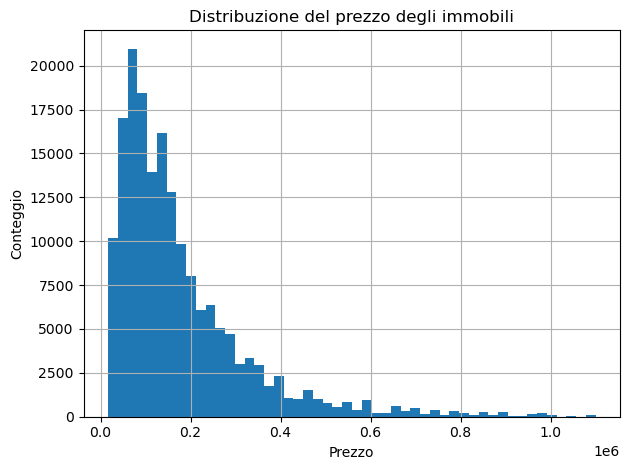

In [25]:
import matplotlib.pyplot as plt

plt.figure()
df_clean["price"].hist(bins=50)
plt.title("Distribuzione del prezzo degli immobili")
plt.xlabel("Prezzo")
plt.ylabel("Conteggio")
plt.tight_layout()
plt.show()


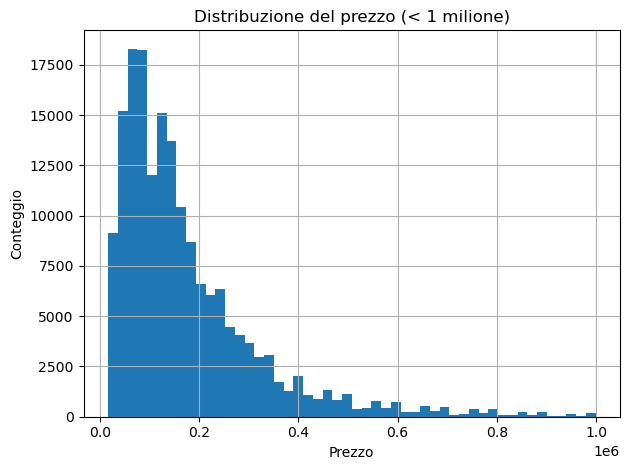

In [26]:
plt.figure()
df_clean[df_clean["price"] < 1_000_000]["price"].hist(bins=50)
plt.title("Distribuzione del prezzo (< 1 milione)")
plt.xlabel("Prezzo")
plt.ylabel("Conteggio")
plt.tight_layout()
plt.show()


### Osservazioni sulla distribuzione dei prezzi

- La maggior parte degli immobili è concentrata nella fascia tra 50.000 € e 250.000 €.
- La distribuzione è fortemente asimmetrica verso destra: pochi immobili hanno prezzi molto elevati.
- Rimuovere gli outlier ha migliorato la leggibilità della distribuzione.


In [27]:
# Località più frequenti
df_clean["location"].value_counts().head(20)


location
pisa               189
la spezia          180
cascina            172
parma              172
rapallo            167
novara             164
reggio calabria    164
l'aquila           163
cuneo              162
ravenna            162
massa              162
capannori          153
bari               152
carpi              151
empoli             150
bergamo            148
trieste            148
sanremo            143
viterbo            143
monza              143
Name: count, dtype: int64

In [28]:
city_stats = (
    df_clean
    .groupby("location")
    .agg(
        n_listings=("price", "count"),
        avg_price=("price", "mean"),
        avg_price_sqm=("price_per_sqm", "mean")
    )
    .reset_index()
)

# Guardiamo le città con almeno 100 annunci, ordinate per prezzo al m²
top_cities = (
    city_stats[city_stats["n_listings"] >= 100]
    .sort_values("avg_price_sqm", ascending=False)
    .head(10)
)

top_cities


,location,n_listings,avg_price,avg_price_sqm
648,bolzano,115,446686.956522,4639.092775
2434,firenze,118,383192.542373,4341.045263
4981,riccione,116,471985.991379,4260.604176
3536,milano,129,369315.131783,4032.916464
5959,siena,140,414306.000000,3659.101814
6681,venezia,113,348458.061947,3258.335704
5271,salerno,111,325505.855856,2858.307451
4922,rapallo,167,250413.173653,2725.182270
5598,sanremo,143,223986.013986,2719.209324
4582,pisa,189,263008.994709,2588.993967


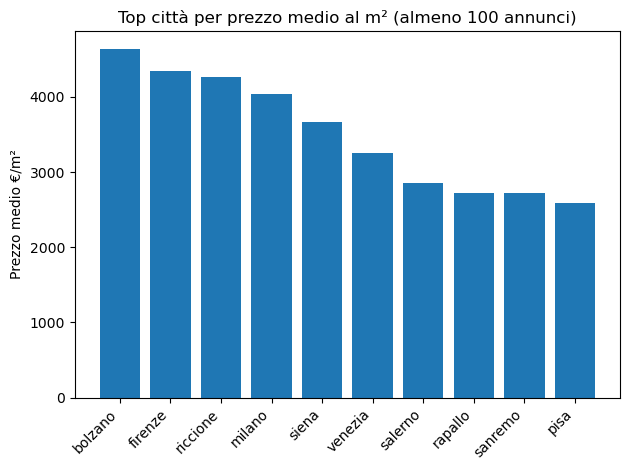

In [29]:
plt.figure()
plt.bar(top_cities["location"], top_cities["avg_price_sqm"])
plt.xticks(rotation=45, ha="right")
plt.title("Top città per prezzo medio al m² (almeno 100 annunci)")
plt.ylabel("Prezzo medio €/m²")
plt.tight_layout()
plt.show()


### Insights sul prezzo medio al metro quadro
L’analisi evidenzia che Bolzano è la città con il prezzo medio al m² più alto tra quelle con almeno 100 annunci.  
Seguono Firenze, Riccione e Milano, caratterizzate da mercati immobiliari particolarmente competitivi.

I valori elevati suggeriscono:
- forte pressione della domanda,
- limitata disponibilità di immobili nelle zone centrali,
- qualità della vita e servizi superiori alla media,
- attrattività turistica o economica.

Nella parte bassa del ranking (Pisa, Sanremo, Rapallo) il prezzo al m² è più contenuto, indicando mercati meno tesi o con maggiore disponibilità di immobili.


Questa analisi aiuta a identificare le aree più costose in Italia, utile per investitori, agenzie immobiliari e privati che valutano operazioni di compravendita.


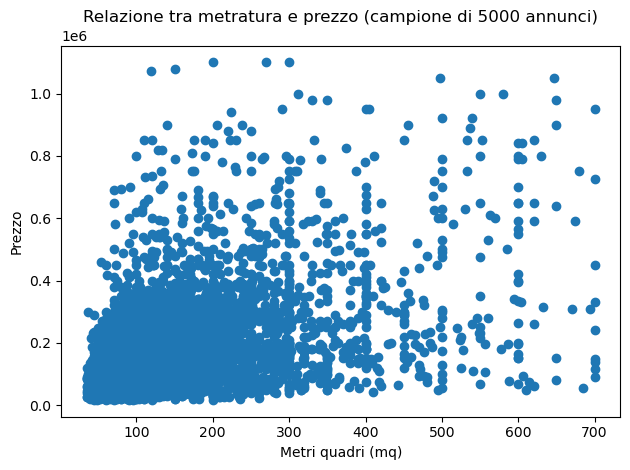

In [31]:
sample = df_clean.sample(5000, random_state=0)

plt.figure()
plt.scatter(sample["mq"], sample["price"])
plt.title("Relazione tra metratura e prezzo (campione di 5000 annunci)")
plt.xlabel("Metri quadri (mq)")
plt.ylabel("Prezzo")
plt.tight_layout()
plt.show()


### Analisi della relazione tra metri quadri e prezzo
Lo scatter plot evidenzia una relazione positiva tra metratura e prezzo: in media, gli immobili più grandi hanno valori economici maggiori.  

La dispersione verticale molto ampia per ogni valore di metratura indica però che il prezzo non è determinato solo dai metri quadri.  
Fattori come:

- localizzazione (centro vs periferia, città diverse),
- stato di manutenzione,
- classe energetica,
- presenza di spazi esterni (balcone, terrazzo, giardino),

giocano un ruolo decisivo nel definire il valore dell’immobile.  

Si osserva inoltre che la maggior parte degli immobili si concentra tra **50 e 150 m²**, fascia tipica del mercato residenziale italiano.  
Sopra i 500 m², invece, si entra nel segmento degli immobili di lusso, caratterizzati da un prezzo molto elevato e variabile.


Questa analisi conferma che la sola metratura non è sufficiente per prevedere il prezzo: sarà necessario costruire modelli che includano ulteriori variabili (location, anno di costruzione, servizi).


### Heatmap delle correlazioni
Analizzo le correlazioni tra le variabili numeriche per identificare relazioni lineari utili all'interpretazione.


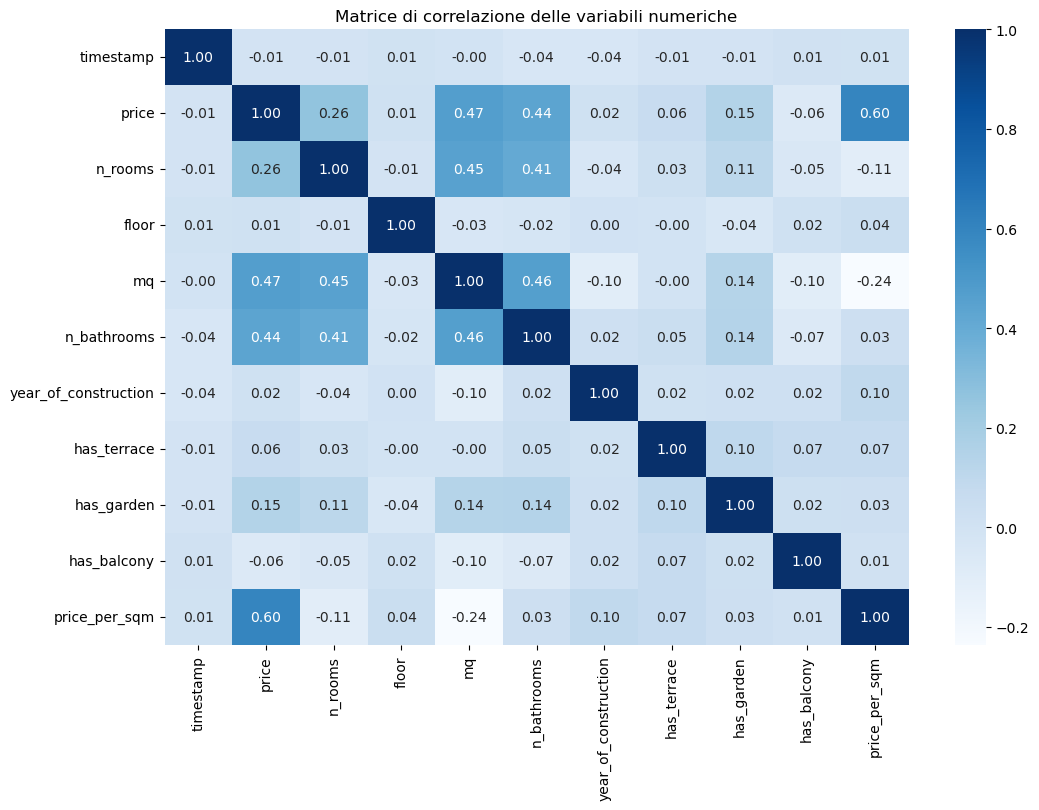

In [32]:
import seaborn as sns
plt.figure(figsize=(12, 8))

corr = df_clean.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matrice di correlazione delle variabili numeriche")
plt.show()



La heatmap evidenzia correlazioni moderate tra prezzo e variabili strutturali (mq, numero di bagni, numero di stanze), mentre l’anno di costruzione e le caratteristiche accessorie (terrazzo, balcone, giardino) hanno un impatto limitato.  
Questo suggerisce che il valore degli immobili dipende principalmente dalla dimensione e dalla configurazione interna, mentre altri fattori come posizione e qualità dell’immobile (non presenti nel dataset) potrebbero spiegare la variabilità residua.


# Conclusioni dell'Analisi Esplorativa (EDA)

L’analisi esplorativa del dataset immobiliare italiano ha evidenziato diversi aspetti chiave:

### Distribuzione dei prezzi
I prezzi degli immobili mostrano una distribuzione asimmetrica: la maggior parte degli annunci rientra tra 50.000 € e 250.000 €, mentre gli immobili molto costosi sono pochi e costituiscono la "coda lunga" della distribuzione.

### Dimensioni degli immobili
La maggior parte degli appartamenti ha una metratura compresa tra 50 e 150 m², tipica del mercato residenziale. Gli immobili di lusso (> 300 m²) sono rari e molto variabili nel prezzo.

### Prezzo al metro quadro
Il prezzo al m² varia fortemente da città a città. Le località più costose (es. Bolzano, Firenze, Milano) confermano un mercato immobiliare molto competitivo, mentre città con prezzi più bassi mostrano dinamiche meno tese.

### Relazione tra prezzo e caratteristiche
- La metratura, il numero di stanze e di bagni mostrano una correlazione moderata con il prezzo: gli immobili più grandi e con più servizi tendono a costare di più.
- L’anno di costruzione ha un impatto minimo sul prezzo.
- Le caratteristiche accessorie (giardino, balcone, terrazzo) mostrano correlazioni deboli, indicando che influiscono solo marginalmente sul valore complessivo.

### Considerazioni finali
Il prezzo degli immobili non è determinato da una sola variabile, ma da una combinazione di fattori strutturali e, soprattutto, da elementi non presenti nel dataset (posizione precisa, stato dell’immobile, qualità della zona).  
L’EDA ha permesso di pulire e comprendere a fondo il dataset, preparandolo per le analisi successive in SQL e Power BI.
Il dataset pulito è ora pronto per essere esportato e utilizzato nelle fasi di analisi avanzata.


In [35]:
df_clean.to_csv("housing_clean.csv", index=False)

